In [ ]:
pip install scipy numpy matplotlib umap-learn pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=136580d374580f185d1ba584257ca95fd08a58f24695a27f6afbc0d9ab6f30d9
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=8d5f6f5c8edba039ae0b4856beacb39b204a4de22fcda451db212cf9eecfe8fa
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:
# May take a minute
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Connect this notebook to google drive (should pop up and request access)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bird = 'B119' # B119,Pk106,Pk144,Pk146,R70,W115
FS= 30000
inputDataset = np.load(f'/content/drive/MyDrive/Processed_Bird/{bird}-Processed_5ms-Neural_30-Bouts.npz')

Vocal_data = inputDataset['vocal_data']
Neural_data = inputDataset['neural_data']
Vocal_time = inputDataset['vocal_time']
Neural_time = inputDataset['neural_time']

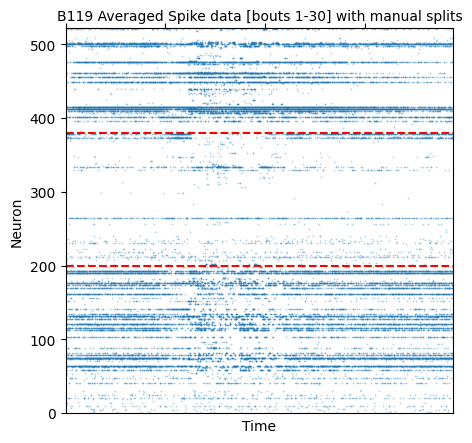

In [ ]:
aveSpike = np.mean(Neural_data[0:30],axis = 0)
# Let's plot this using plt.spy (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.spy.html)
from scipy.ndimage import gaussian_filter


plt.figure(figsize = (5,5))
extentInput = [Neural_time[0],Neural_time[-1],0,aveSpike.shape[0]] # Need to tell the plot our xmin,xmax,ymin,ymax for the image data
plt.spy(aveSpike,origin = 'lower',aspect = 'auto',precision = .1,markersize = .1) #,extent = extentInput
plt.title(f'{bird} Averaged Spike data [bouts 1-30] with manual splits',fontsize = 10)
plt.ylabel('Neuron',fontsize = 10)
plt.xlabel('Time',fontsize = 10)


plt.tick_params(labelbottom = False, bottom = False)



topSplit = 380
bottomSplit = 200

plt.axhline(y = bottomSplit, color = 'r', linestyle = '--')
plt.axhline(y = topSplit, color = 'r', linestyle = '--')

# plt.savefig(f'Ave_Spiking_{bird}_with_top-{topSplit}_bottom-{bottomSplit}.png')
# plt.show()

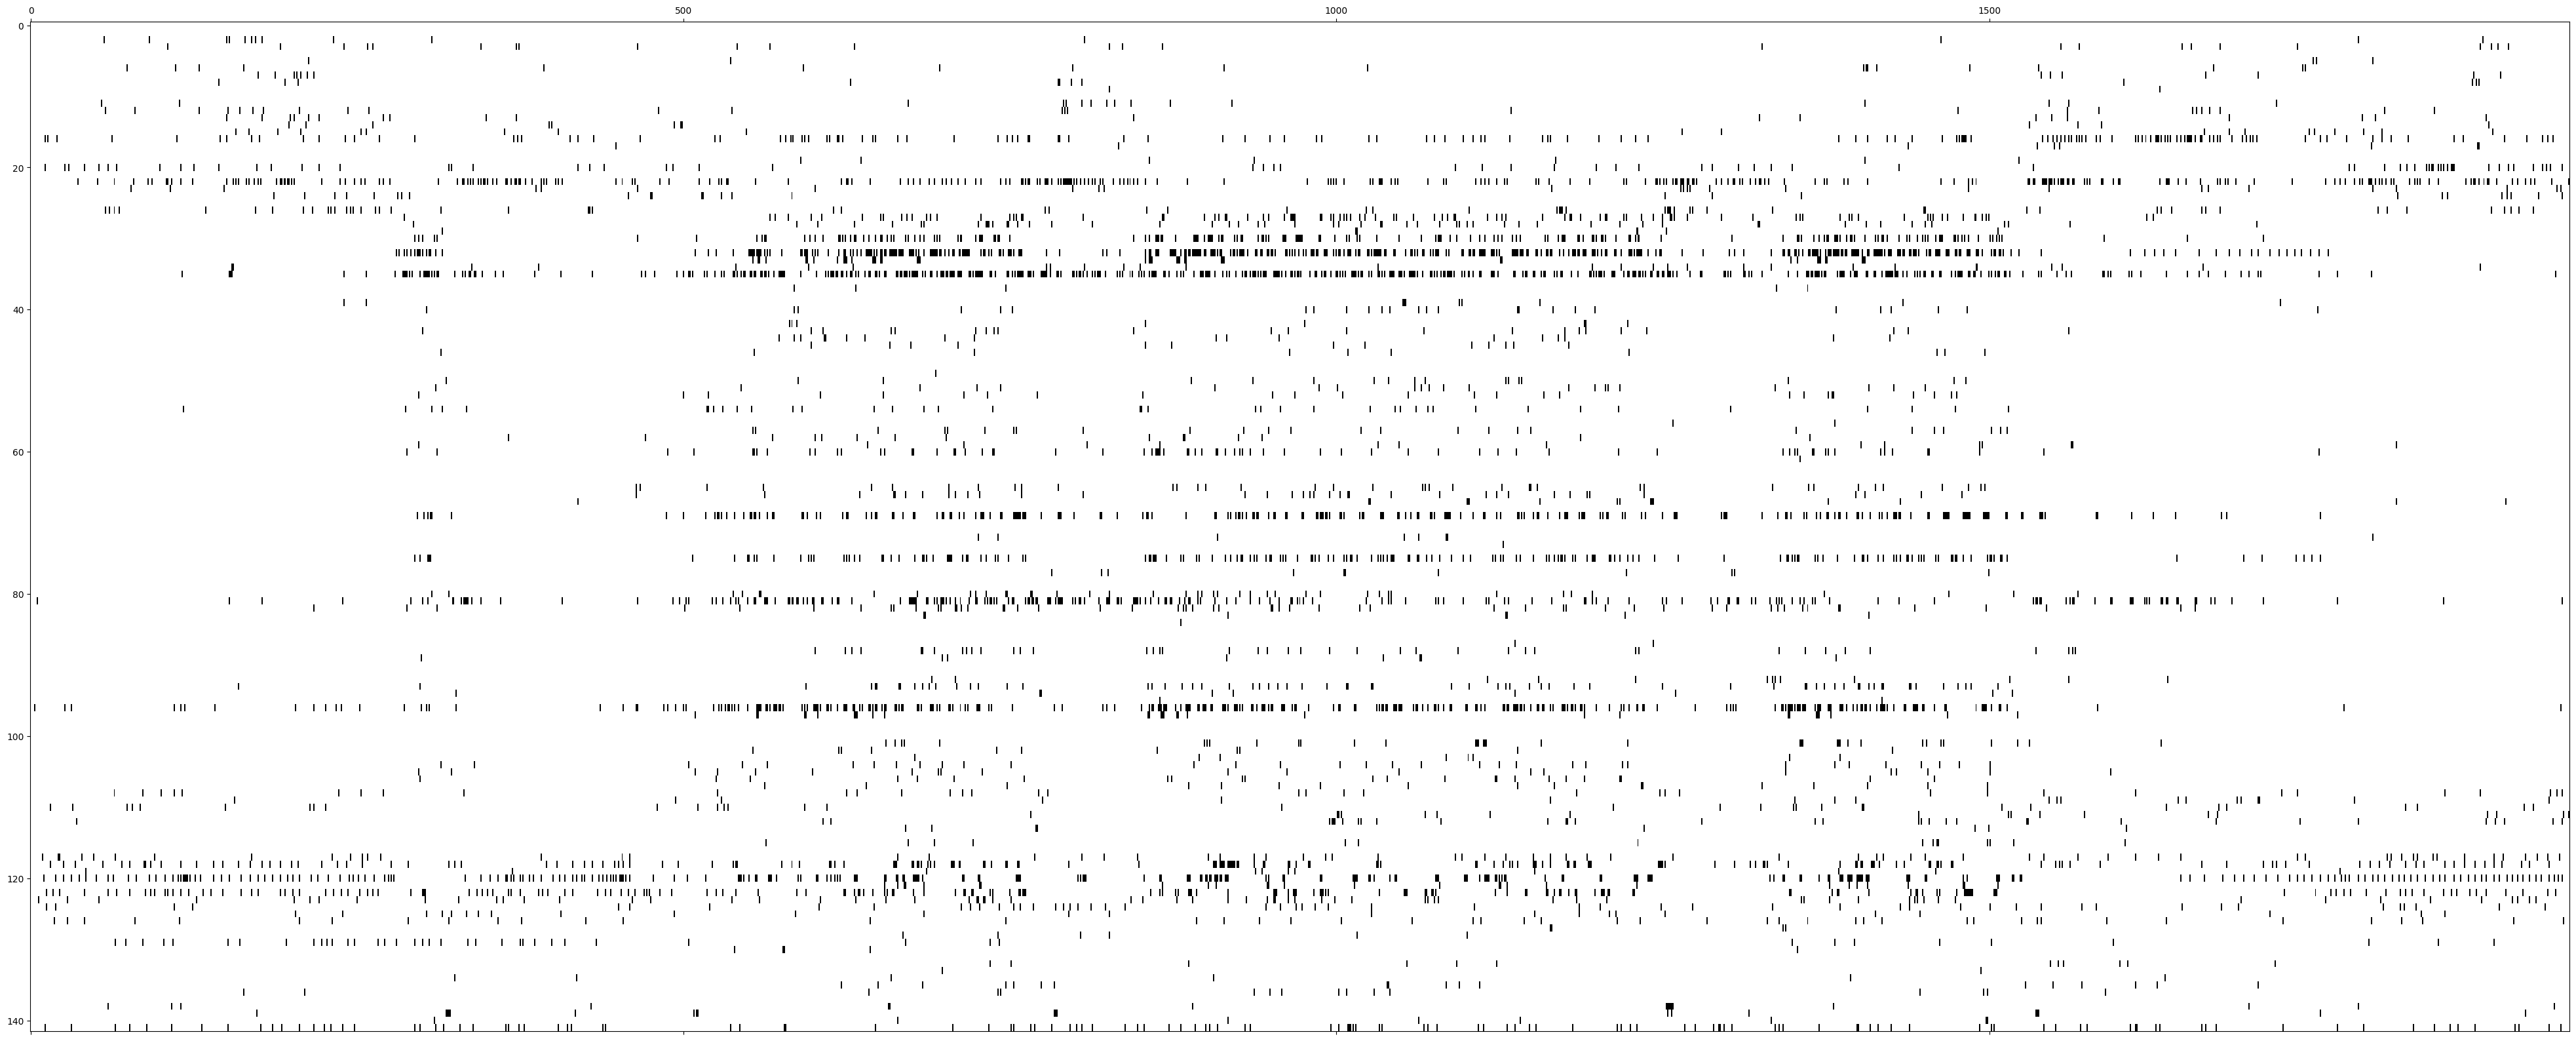

In [ ]:
plt.figure(figsize = (50,20))
top_data = Neural_data[0][topSplit:,:]
plt.spy(top_data,aspect = 'auto')

In [ ]:
from sklearn.cluster import KMeans
N = 10
kmeans1 = KMeans(n_clusters=N, random_state=0, n_init="auto").fit(top_data.T)
labels1 = kmeans1.labels_
print(labels1)
print(top_data.shape)
print(labels1.shape)
# plt.scatter(spk_emb_2D_top[:,0],spk_emb_2D_top[:,1],s = .5,c = labels1)



[1 1 1 ... 1 1 8]
(142, 1945)
(1945,)


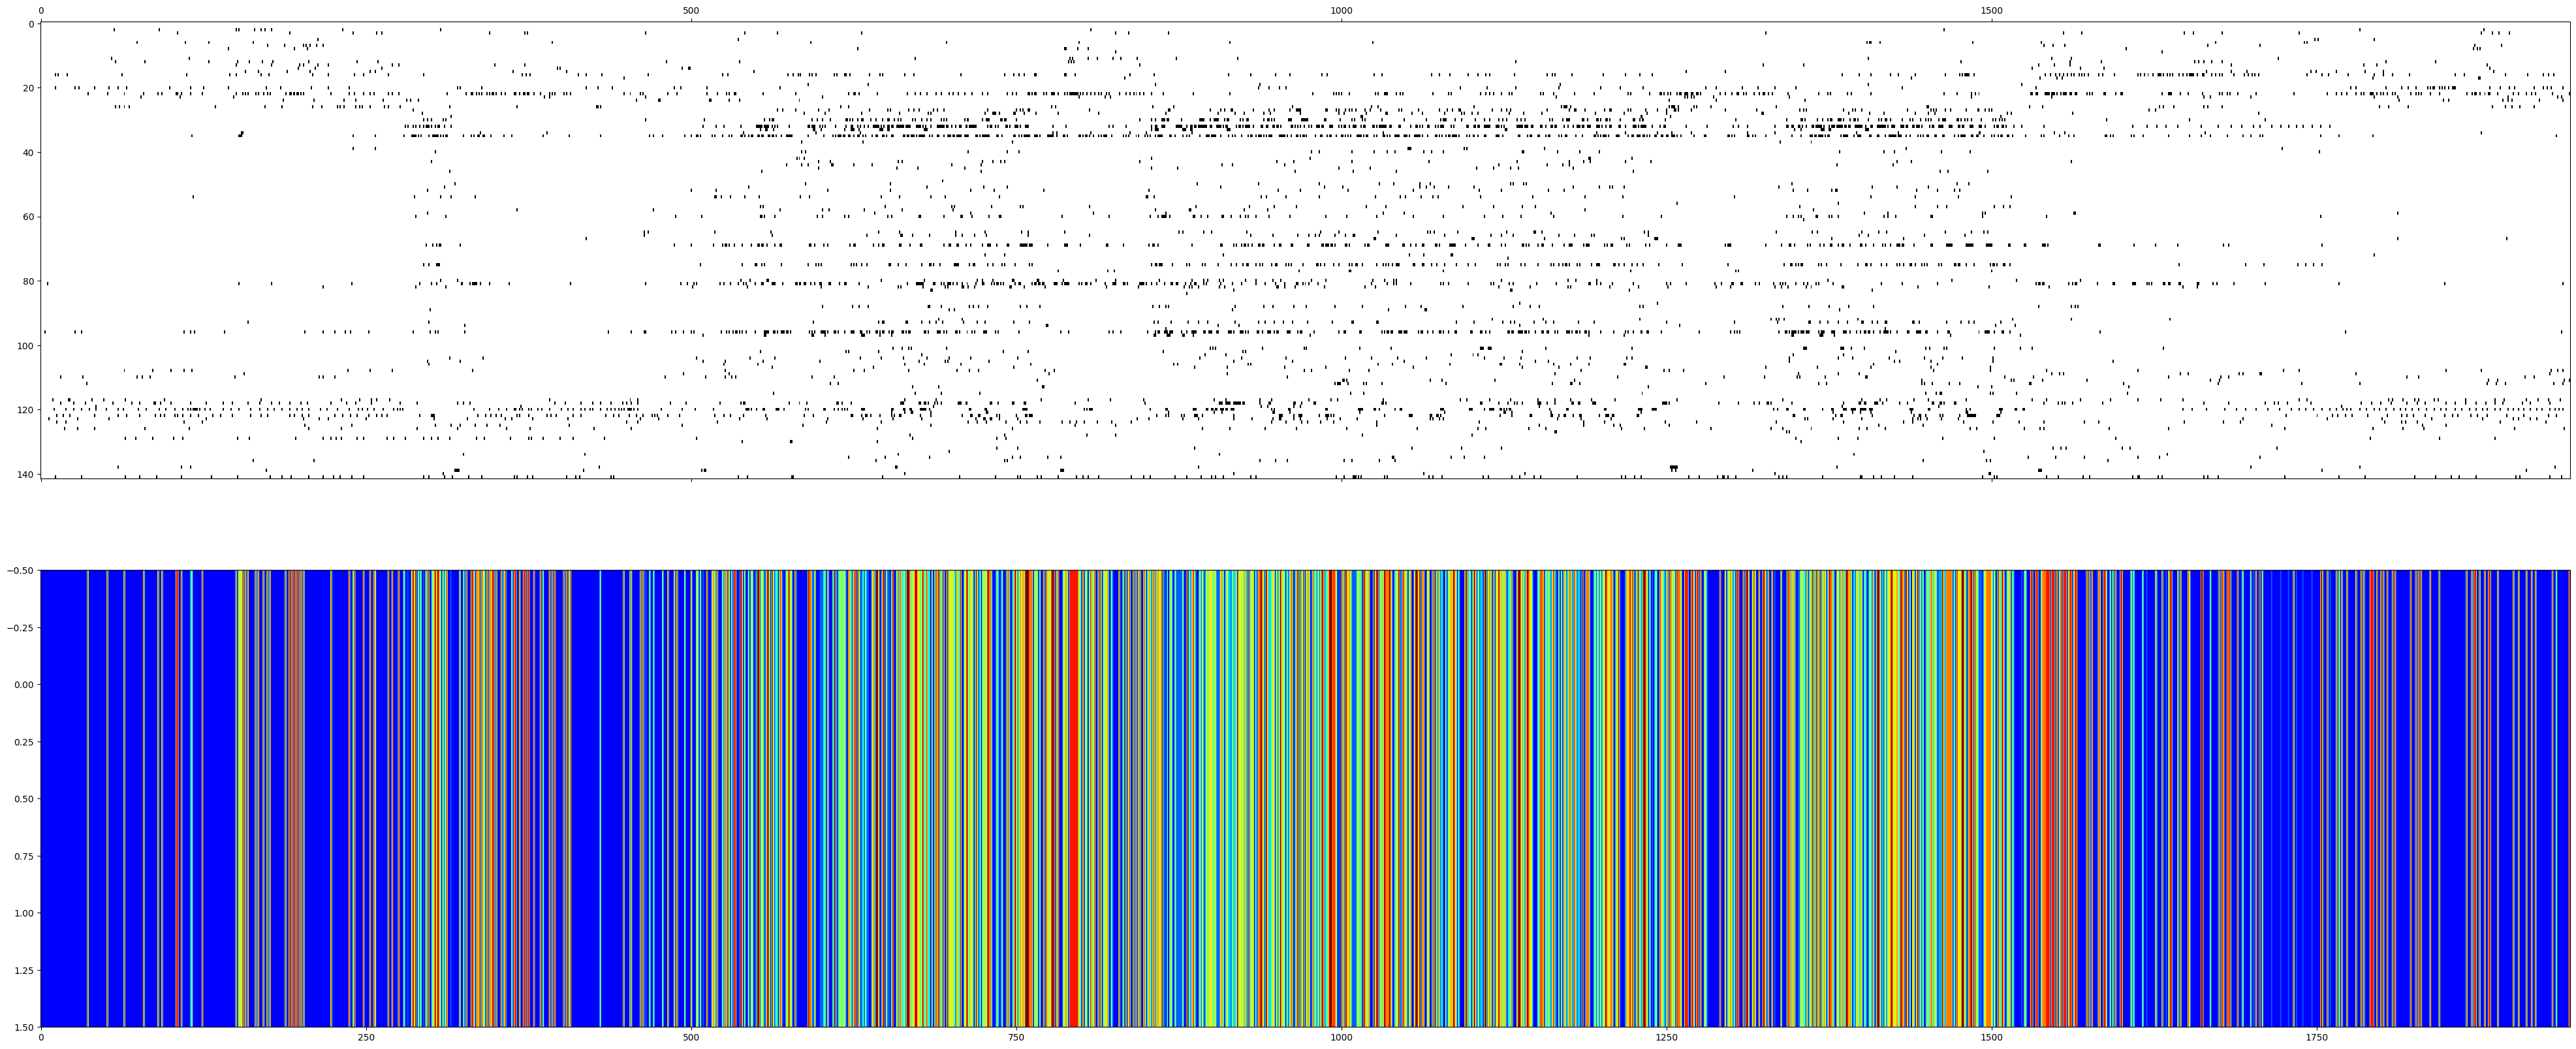

In [ ]:
plt.figure(figsize = (50,20))
plt.subplot(2,1,1)
plt.spy(top_data,aspect = 'auto')
plt.subplot(2,1,2)
plt.imshow(np.vstack((labels1,labels1)),aspect = 'auto',cmap = 'jet')